In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
#os.chdir('/My Drive/SCLA Grp Assignment/')
%cd /content/drive/My Drive/SCLA Grp Assignment/
#os.chdir("sample_data//My Drive//")

/content/drive/My Drive/SCLA Grp Assignment


In [35]:
import numpy as np
import pandas as pd

In [36]:
df = pd.read_excel('09_Inventory.xlsx')
df1 = pd.read_csv('Inventory_Feat_Engg_data.csv')
df2 = pd.read_csv('Inventory_OHE_data.csv')

### Using PYCARET to get an overview

In [6]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.0MB/s 
     |████████████████████████████████| 2.0MB 4.5MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 1.7MB 13.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 17.8MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 215kB 51.3MB/s 
     |████████████████████████████████| 14.2MB 255kB/s 
     |████████████████████████████████| 245kB 53.2MB/s 
     |████████████████████████████████| 276kB 42.8MB/s 
     |████████████████████████████████| 1.2MB 29.5MB/s 
     |████████████████████████████████| 153kB 41.9MB/s 
     |████████████████████████████████| 163kB 46.4MB/s 
     |████████████████████████████████| 1.1MB 25.5MB/s

In [7]:
df['Order Date'] =df['Order Date'].astype('datetime64[ns]')

In [8]:
from pycaret.classification import *
train = df.copy()
clf = setup(data = train, target = 'Ship Mode', session_id = 786, silent = True)

,Description,Value
0,session_id,786
1,Target,Ship Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8819,0.7768,0.6667,0.7800,0.8272,0.6498,0.7045,1.886
rf,Random Forest Classifier,0.8799,0.7811,0.6666,0.7918,0.8269,0.6456,0.6966,3.578
gbc,Gradient Boosting Classifier,0.8767,0.7993,0.6682,0.7993,0.8275,0.6399,0.6842,21.320
ridge,Ridge Classifier,0.8645,0.0000,0.6671,0.7959,0.8238,0.6155,0.6443,0.284
nb,Naive Bayes,0.8599,0.7798,0.6445,0.7587,0.8060,0.5932,0.6347,0.140
et,Extra Trees Classifier,0.8599,0.7807,0.6676,0.7970,0.8228,0.6073,0.6308,4.989
lr,Logistic Regression,0.8223,0.7289,0.5393,0.7276,0.7620,0.4184,0.4819,4.672
dt,Decision Tree Classifier,0.8179,0.7518,0.6727,0.8004,0.8086,0.5401,0.5420,1.508
lda,Linear Discriminant Analysis,0.8170,0.7752,0.6719,0.8000,0.8079,0.5375,0.5392,3.912
svm,SVM - Linear Kernel,0.7375,0.0000,0.3776,0.6256,0.6622,0.0956,0.1283,3.417


CPU times: user 9.52 s, sys: 521 ms, total: 10 s
Wall time: 8min 29s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=786)

In [28]:
train = df.copy()
clf = setup(data = train, target = 'Ship Mode', session_id = 786, silent = True, ignore_low_variance=True)

,Description,Value
0,session_id,786
1,Target,Ship Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8819,0.7768,0.6667,0.7800,0.8272,0.6498,0.7045,1.904
rf,Random Forest Classifier,0.8799,0.7811,0.6666,0.7918,0.8269,0.6456,0.6966,3.543
gbc,Gradient Boosting Classifier,0.8767,0.7993,0.6682,0.7993,0.8275,0.6399,0.6842,21.537
ridge,Ridge Classifier,0.8645,0.0000,0.6671,0.7959,0.8238,0.6155,0.6443,0.288
nb,Naive Bayes,0.8599,0.7798,0.6445,0.7587,0.8060,0.5932,0.6347,0.150
et,Extra Trees Classifier,0.8599,0.7807,0.6676,0.7970,0.8228,0.6073,0.6308,5.047
lr,Logistic Regression,0.8223,0.7289,0.5393,0.7276,0.7620,0.4184,0.4819,4.445
dt,Decision Tree Classifier,0.8179,0.7518,0.6727,0.8004,0.8086,0.5401,0.5420,1.511
lda,Linear Discriminant Analysis,0.8170,0.7752,0.6719,0.8000,0.8079,0.5375,0.5392,4.045
svm,SVM - Linear Kernel,0.7375,0.0000,0.3776,0.6256,0.6622,0.0956,0.1283,3.442


CPU times: user 10.2 s, sys: 552 ms, total: 10.8 s
Wall time: 8min 36s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=786)

In [30]:
df1.head()

,Order Date,Order ID,Order Quantity,Product Container,Product Name,Product Sub-Category,Sales,Order_Day,Order_Month,Order_Year,Order_Age,Order_ID_cnt,Product_Container_cnt,Product_Name_cnt,Product_Sub-Category_cnt,Order_Day_cnt,Order_Month_cnt,Ship_Mode
0,2007-01-27,24544,31,Medium Box,Canon MP41DH Printing Calculator,Office Machines,6567,Saturday,January,2007,14,3,344,16,317,1074,519,Express Air
1,2007-01-27,24544,39,Large Box,Fellowes Neat Ideas® Storage Cubes,Storage & Organization,1780,Saturday,January,2007,14,3,378,4,521,1074,519,Regular Air
2,2007-01-27,24544,15,Jumbo Drum,"Global Stack Chair without Arms, Black",Chairs & Chairmats,578,Saturday,January,2007,14,3,573,13,352,1074,519,Delivery Truck
3,2007-01-27,20422,30,Small Pack,Nu-Dell Leatherette Frames,Office Furnishings,611,Saturday,January,2007,14,2,894,10,726,1074,519,Regular Air
4,2007-01-27,55937,10,Small Box,"IBM Active Response Keyboard, Black",Computer Peripherals,517,Saturday,January,2007,14,2,4081,8,715,1074,519,Regular Air


In [10]:
train1 = df1.copy()
train1 = train1.drop(['Order Date', 'Order ID'], axis=1)
clf1 = setup(data = train1, target = 'Ship_Mode', session_id = 786, silent = True)

,Description,Value
0,session_id,786
1,Target,Ship_Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 16)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8819,0.7709,0.6667,0.7800,0.8272,0.6498,0.7045,29.347
ada,Ada Boost Classifier,0.8819,0.7768,0.6667,0.7800,0.8272,0.6498,0.7045,1.898
rf,Random Forest Classifier,0.8801,0.7786,0.6659,0.7798,0.8263,0.6456,0.6977,3.290
gbc,Gradient Boosting Classifier,0.8741,0.7964,0.6671,0.7958,0.8262,0.6342,0.6752,21.505
et,Extra Trees Classifier,0.8688,0.7842,0.6677,0.7973,0.8254,0.6242,0.6575,4.562
ridge,Ridge Classifier,0.8639,0.0000,0.6668,0.7962,0.8235,0.6144,0.6426,0.287
dt,Decision Tree Classifier,0.8172,0.7486,0.6676,0.7967,0.8062,0.5358,0.5383,1.269
lda,Linear Discriminant Analysis,0.8159,0.7746,0.6701,0.7986,0.8067,0.5346,0.5363,4.007
nb,Naive Bayes,0.8088,0.7808,0.6625,0.7802,0.7929,0.5217,0.5238,0.144
qda,Quadratic Discriminant Analysis,0.7795,0.7325,0.6529,0.7720,0.7726,0.4803,0.4860,3.462


CPU times: user 1min 27s, sys: 5.69 s, total: 1min 33s
Wall time: 12min 50s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
train1 = df1.copy()
train1 = train1.drop(['Order Date', 'Order ID'], axis=1)
clf1 = setup(data = train1, target = 'Ship_Mode', session_id = 786, silent = True, pca = True, pca_components = 10)

,Description,Value
0,session_id,786
1,Target,Ship_Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 16)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8388,0.7777,0.6149,0.7615,0.7891,0.5355,0.5688,0.554
gbc,Gradient Boosting Classifier,0.8352,0.7792,0.6061,0.7495,0.7835,0.5238,0.5585,4.398
rf,Random Forest Classifier,0.8343,0.7660,0.6040,0.7603,0.7827,0.5200,0.5556,1.624
qda,Quadratic Discriminant Analysis,0.8335,0.7682,0.6192,0.7366,0.7818,0.5318,0.5606,0.027
et,Extra Trees Classifier,0.8310,0.7717,0.6071,0.7559,0.7822,0.5165,0.5472,0.820
nb,Naive Bayes,0.7966,0.7650,0.4945,0.7008,0.7387,0.3430,0.4079,0.025
ada,Ada Boost Classifier,0.7826,0.7606,0.5937,0.7427,0.7588,0.4389,0.4510,0.425
lr,Logistic Regression,0.7784,0.7312,0.4423,0.6844,0.7125,0.2423,0.3226,1.833
lda,Linear Discriminant Analysis,0.7772,0.7371,0.4402,0.6823,0.7111,0.2384,0.3171,0.029
ridge,Ridge Classifier,0.7644,0.0000,0.4007,0.6687,0.6883,0.1567,0.2421,0.023


CPU times: user 6.73 s, sys: 255 ms, total: 6.99 s
Wall time: 1min 44s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=786, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
df2.head()

,Order ID,Order Quantity,Sales,Order_Year,Order_Age,Product Container_Jumbo Drum,Product Container_Large Box,Product Container_Medium Box,Product Container_Small Box,Product Container_Small Pack,Product Container_Wrap Bag,Product Sub-Category_Binders and Binder Accessories,Product Sub-Category_Bookcases,Product Sub-Category_Chairs & Chairmats,Product Sub-Category_Computer Peripherals,Product Sub-Category_Copiers and Fax,Product Sub-Category_Envelopes,Product Sub-Category_Labels,Product Sub-Category_Office Furnishings,Product Sub-Category_Office Machines,Product Sub-Category_Paper,Product Sub-Category_Pens & Art Supplies,Product Sub-Category_Rubber Bands,"Product Sub-Category_Scissors, Rulers and Trimmers",Product Sub-Category_Storage & Organization,Product Sub-Category_Tables,Product Sub-Category_Telephones and Communication,Order_Day_Monday,Order_Day_Saturday,Order_Day_Sunday,Order_Day_Thursday,Order_Day_Tuesday,Order_Day_Wednesday,Order_Month_August,Order_Month_December,Order_Month_February,Order_Month_January,Order_Month_July,Order_Month_June,Order_Month_March,Order_Month_May,Order_Month_November,Order_Month_October,Order_Month_September,Ship_Mode
0,24544,31,6567,2007,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Express Air
1,24544,39,1780,2007,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Regular Air
2,24544,15,578,2007,14,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Delivery Truck
3,20422,30,611,2007,14,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Regular Air
4,55937,10,517,2007,14,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Regular Air


In [32]:
train2 = df2.copy()
clf2 = setup(data = train2, target = 'Ship_Mode', session_id = 786, silent = True)

,Description,Value
0,session_id,786
1,Target,Ship_Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 45)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,41
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8819,0.0000,0.6667,0.7800,0.8272,0.6498,0.7045,0.034
gbc,Gradient Boosting Classifier,0.8805,0.7924,0.6660,0.7798,0.8265,0.6464,0.6990,2.585
rf,Random Forest Classifier,0.8799,0.7753,0.6654,0.7793,0.8260,0.6449,0.6973,0.941
lightgbm,Light Gradient Boosting Machine,0.8776,0.7907,0.6660,0.7869,0.8260,0.6405,0.6880,0.308
lda,Linear Discriminant Analysis,0.8728,0.7715,0.6509,0.7719,0.8185,0.6214,0.6756,0.074
et,Extra Trees Classifier,0.8586,0.7717,0.6666,0.7966,0.8220,0.6044,0.6271,0.897
ada,Ada Boost Classifier,0.8468,0.7752,0.6662,0.7920,0.8163,0.5842,0.6031,0.323
nb,Naive Bayes,0.8254,0.7835,0.5645,0.7282,0.7714,0.4647,0.5182,0.037
lr,Logistic Regression,0.7759,0.7393,0.4306,0.6827,0.7041,0.2133,0.2922,0.355
dt,Decision Tree Classifier,0.7739,0.7301,0.6586,0.7914,0.7823,0.4697,0.4708,0.071


CPU times: user 5.22 s, sys: 321 ms, total: 5.54 s
Wall time: 1min 4s


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=786, solver='auto',
                tol=0.001)

In [15]:
train2 = df2.copy()
clf2 = setup(data = train2, target = 'Ship_Mode', session_id = 786, silent = True, remove_multicollinearity=True)

,Description,Value
0,session_id,786
1,Target,Ship_Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 45)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,41
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
%%time
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8819,0.0000,0.6667,0.7800,0.8272,0.6498,0.7045,0.036
gbc,Gradient Boosting Classifier,0.8805,0.7924,0.6660,0.7798,0.8265,0.6464,0.6990,2.599
rf,Random Forest Classifier,0.8799,0.7753,0.6654,0.7793,0.8260,0.6449,0.6973,0.931
lightgbm,Light Gradient Boosting Machine,0.8776,0.7907,0.6660,0.7869,0.8260,0.6405,0.6880,0.309
lda,Linear Discriminant Analysis,0.8728,0.7715,0.6509,0.7719,0.8185,0.6214,0.6756,0.075
et,Extra Trees Classifier,0.8586,0.7717,0.6666,0.7966,0.8220,0.6044,0.6271,0.915
ada,Ada Boost Classifier,0.8468,0.7752,0.6662,0.7920,0.8163,0.5842,0.6031,0.326
nb,Naive Bayes,0.8254,0.7835,0.5645,0.7282,0.7714,0.4647,0.5182,0.038
lr,Logistic Regression,0.7759,0.7393,0.4306,0.6827,0.7041,0.2133,0.2922,0.353
dt,Decision Tree Classifier,0.7739,0.7301,0.6586,0.7914,0.7823,0.4697,0.4708,0.065


CPU times: user 5.23 s, sys: 262 ms, total: 5.5 s
Wall time: 1min 4s


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=786, solver='auto',
                tol=0.001)

Data and Model comparision

Create model for df1 dataset

In [37]:
clf = setup(data = train, target = 'Ship Mode', session_id = 786, silent = True)

,Description,Value
0,session_id,786
1,Target,Ship Mode
2,Target Type,Multiclass
3,Label Encoded,"Delivery Truck: 0, Express Air: 1, Regular Air: 2"
4,Original Data,"(7853, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
# create adaptive boosting model on the basis of High Accuracyl
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
1,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
2,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
3,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
4,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
5,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
6,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
7,0.8834,0.7788,0.6667,0.7826,0.8294,0.6536,0.7073
8,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026
9,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026


In [40]:
# tune ada model
tuned_ada = tune_model(ada, optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
1,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
2,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
3,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
4,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
5,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
6,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
7,0.8834,0.7788,0.6667,0.7826,0.8294,0.6536,0.7073
8,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026
9,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026


In [41]:
# parameters of tuned_ada
print(tuned_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=50, random_state=786)


In [42]:
# create adaptive boosting model on the basis of High Accuracyl
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8764,0.8009,0.6642,0.7792,0.8243,0.6375,0.6846
1,0.8818,0.7807,0.6667,0.7798,0.8271,0.6499,0.7046
2,0.8800,0.7799,0.6659,0.7796,0.8262,0.6457,0.6978
3,0.8800,0.7841,0.6659,0.7796,0.8262,0.6457,0.6978
4,0.8800,0.7788,0.6659,0.7796,0.8262,0.6457,0.6978
5,0.8818,0.7953,0.6710,0.8400,0.8305,0.6523,0.7027
6,0.8800,0.7796,0.6659,0.7796,0.8262,0.6457,0.6978
7,0.8798,0.7757,0.6650,0.7822,0.8275,0.6452,0.6938
8,0.8780,0.7647,0.6650,0.7790,0.8249,0.6389,0.6890
9,0.8816,0.7713,0.6710,0.8398,0.8302,0.6497,0.7006


In [43]:
# tune ada model
tuned_rf = tune_model(rf, optimize = 'f1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
1,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
2,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
3,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
4,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
5,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
6,0.8818,0.7770,0.6667,0.7798,0.8271,0.6499,0.7046
7,0.8834,0.7788,0.6667,0.7826,0.8294,0.6536,0.7073
8,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026
9,0.8816,0.7752,0.6667,0.7794,0.8268,0.6473,0.7026


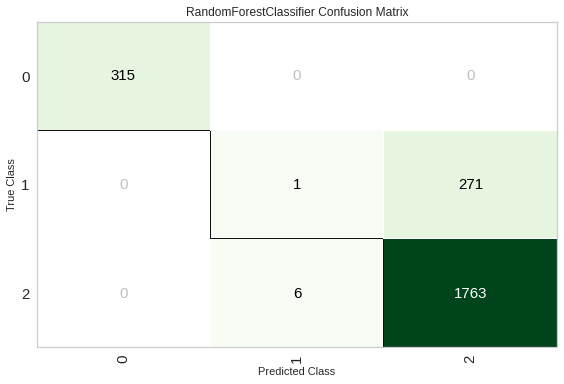

In [44]:
# confusion matrix rf
plot_model(rf, plot = 'confusion_matrix')

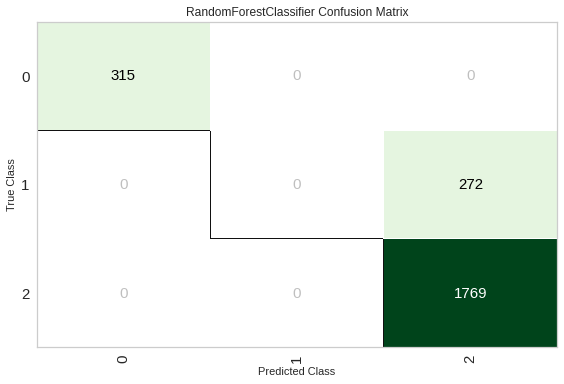

In [45]:
# confusion matrix tuned rf
plot_model(tuned_rf, plot = 'confusion_matrix')

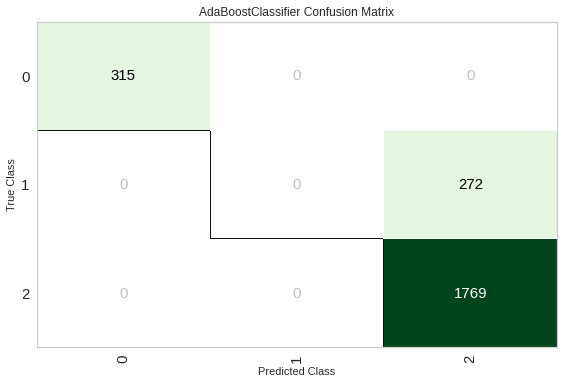

In [46]:
# confusion matrix ada
plot_model(ada, plot = 'confusion_matrix')

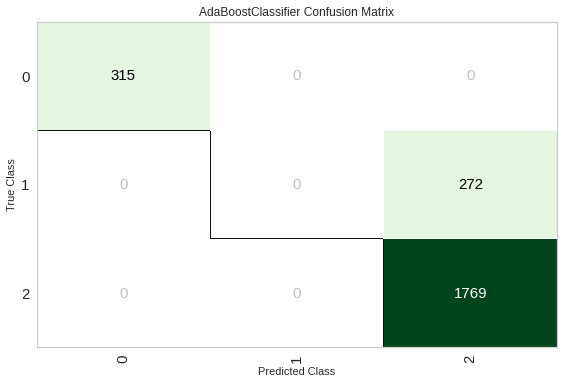

In [47]:
# confusion matrix tuned ada
plot_model(tuned_ada, plot = 'confusion_matrix')

Observation:
1. Tuned adaptive boost, tuned adaptive boost and tuned random forest are performing the same.
2. Random forest is slightly better able to predic the shipping mode

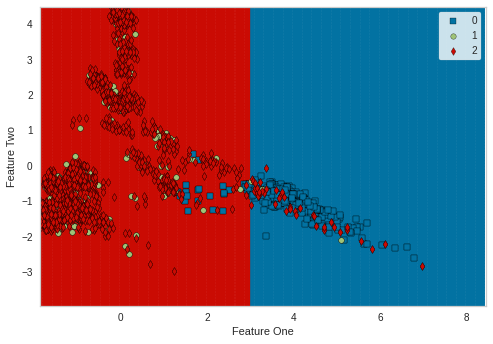

In [48]:
# boundary rf
plot_model(tuned_rf, plot = 'boundary')

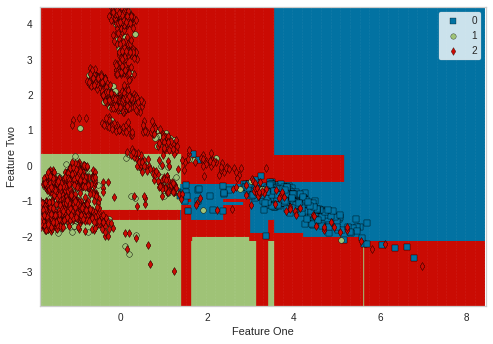

In [50]:
# boundary ada
plot_model(ada, plot = 'boundary')

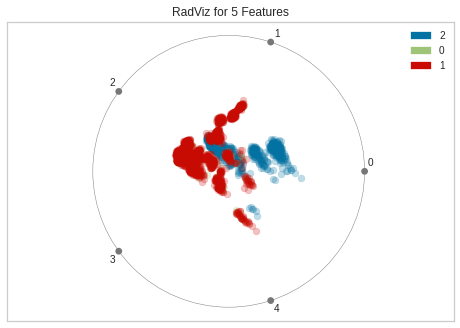

In [51]:
# vc rf
plot_model(rf, plot = 'dimension')

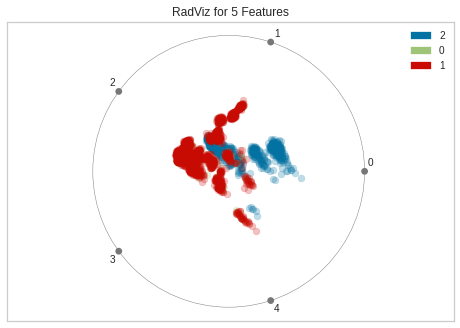

In [52]:
# vc ada
plot_model(ada, plot = 'dimension')

## Ensemble Model

In [ ]:
bagged_rf = ensemble_model(rf, n_estimators = 100)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:24:30
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [ ]:
# auc
plot_model(bagged_rf)

In [ ]:
# confusion matrix
plot_model(bagged_rf, plot = 'confusion_matrix')

In [ ]:
# boundary
plot_model(bagged_rf, plot = 'boundary')

In [ ]:
# vc
plot_model(bagged_rf, plot = 'dimension')

## Predict on holdout set

In [ ]:
pred_holdout = predict_model(bagged_rf)

## Finalize Model

In [ ]:
final_rf = finalize_model(bagged_rf)

## Predictions

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen =  df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
final_rf = finalize_model(bagged_rf)

In [ ]:

#Final K Nearest Neighbour parameters for deployment
print(final_rf)

In [ ]:

unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

In [ ]:
save_model(final_rf,'Final rf 15042021')

In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

In [ ]:
new_prediction.head()